## Libraries

In [15]:
#Installing packages
list.of.packages <- c("ggplot2", "dplyr", "tidyr","lubridate","gridExtra")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "http://cran.us.r-project.org")
invisible(lapply(list.of.packages, library, character.only = TRUE))


## Define Econometric Model

The econometric model that we will explore are the effects of a policy that reduces the speed limit on the number of accidents. 
Under the hypothesis that the policy is effective, we expect that the number of accidents will decrease after the policy is implemented.

In [16]:
# Read data csv
data <- read.csv("data/weeklyGrouping.csv")

In [17]:
# Summary of data
summary(data)

       X               city        station       datetime        
 Min.   :   0.0   Min.   :1.0   Min.   : 1.0   Length:1080       
 1st Qu.: 269.8   1st Qu.:2.0   1st Qu.: 3.0   Class :character  
 Median : 539.5   Median :3.5   Median : 5.5   Mode  :character  
 Mean   : 539.5   Mean   :3.5   Mean   : 5.5                     
 3rd Qu.: 809.2   3rd Qu.:5.0   3rd Qu.: 8.0                     
 Max.   :1079.0   Max.   :6.0   Max.   :10.0                     
    weather           dow             hour            speed      
 Min.   :1.741   Min.   :3.500   Min.   : 9.706   Min.   :24.41  
 1st Qu.:1.988   1st Qu.:4.000   1st Qu.:12.590   1st Qu.:39.47  
 Median :2.038   Median :4.000   Median :12.901   Median :39.50  
 Mean   :2.036   Mean   :4.056   Mean   :12.689   Mean   :38.52  
 3rd Qu.:2.086   3rd Qu.:4.000   3rd Qu.:13.010   3rd Qu.:39.52  
 Max.   :2.284   Max.   :5.500   Max.   :13.208   Max.   :39.74  
  vehicleType    energyConsumption trafficCongestion    carCrash       
 Min

In [18]:
## Read data city csv
data_city <- read.csv("data/cityInfo.csv")

In [19]:
## Summary of data city
summary(data_city)

      city           size         population       popDensity    
 Min.   :1.00   Min.   : 91.0   Min.   : 52620   Min.   : 133.6  
 1st Qu.:2.25   1st Qu.:185.2   1st Qu.:181835   1st Qu.: 437.9  
 Median :3.50   Median :277.5   Median :287334   Median :1203.0  
 Mean   :3.50   Mean   :279.5   Mean   :268883   Mean   :1640.4  
 3rd Qu.:4.75   3rd Qu.:386.2   3rd Qu.:360847   3rd Qu.:1898.9  
 Max.   :6.00   Max.   :454.0   Max.   :453991   Max.   :4988.9  
   cityName        
 Length:6          
 Class :character  
 Mode  :character  
                   
                   
                   

In [20]:
head(data_city)

,city,size,population,popDensity,cityName
,<int>,<int>,<int>,<dbl>,<chr>
1,1,192,379909,1978.6927,Azzurropoli
2,2,91,453991,4988.9121,Biancavilla
3,3,363,271008,746.5785,Lavandonia
4,4,454,152110,335.0441,Celestopoli
5,5,394,52620,133.5533,Plumbeopoli
6,6,183,303659,1659.3388,Aranciopoli


## Cleaning and Visualizing Data

In [21]:
# Mean of data
df_mean = data %>% group_by(city) %>% summarise(mean(speed), mean(energyConsumption), mean(trafficCongestion), mean(carCrash), mean(pedestrianDeath))
df_mean

city,mean(speed),mean(energyConsumption),mean(trafficCongestion),mean(carCrash),mean(pedestrianDeath)
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,33.58362,9.520942,2.943160,0.0024816965,0.0003346852
2,39.50050,8.566597,2.973209,0.0029585868,0.0003967144
3,39.50230,8.567399,2.155911,0.0021044147,0.0002828190
4,39.50015,8.564412,1.135386,0.0011804869,0.0001199830
5,39.50558,8.564934,1.000000,0.0009838568,0.0001455969
6,39.49797,8.567289,2.906029,0.0028883487,0.0003733877


In [22]:
#Standard deviation of data 
df_sd = data %>% group_by(city) %>% summarise(sd(speed), sd(energyConsumption), sd(trafficCongestion), sd(carCrash), sd(pedestrianDeath))
df_sd

city,sd(speed),sd(energyConsumption),sd(trafficCongestion),sd(carCrash),sd(pedestrianDeath)
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.27902013,1.173613706,0.02300260,0.0005710809,1.061174e-04
2,0.02102231,0.006234293,0.02205599,0.0002059879,8.080699e-05
3,0.03110390,0.011457307,0.68445408,0.0007347909,1.326881e-04
4,0.05097502,0.015086516,0.13812135,0.0004784892,1.163076e-04
5,0.09099954,0.023408336,0.00000000,0.0005039476,1.849132e-04
6,0.02323932,0.008021971,0.04638014,0.0002743025,8.742317e-05


After this two observations, we can see that that the standard deviation in the City 1 is higher than in the other cities, and the mean is less than the other cities, thanks to the policy that was implemented.

In [23]:
#Merge df_mean and data_city
df_mean_city = merge(df_mean, data_city, by = "city")
df_mean_city

city,mean(speed),mean(energyConsumption),mean(trafficCongestion),mean(carCrash),mean(pedestrianDeath),size,population,popDensity,cityName
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
1,33.58362,9.520942,2.943160,0.0024816965,0.0003346852,192,379909,1978.6927,Azzurropoli
2,39.50050,8.566597,2.973209,0.0029585868,0.0003967144,91,453991,4988.9121,Biancavilla
3,39.50230,8.567399,2.155911,0.0021044147,0.0002828190,363,271008,746.5785,Lavandonia
4,39.50015,8.564412,1.135386,0.0011804869,0.0001199830,454,152110,335.0441,Celestopoli
5,39.50558,8.564934,1.000000,0.0009838568,0.0001455969,394,52620,133.5533,Plumbeopoli
6,39.49797,8.567289,2.906029,0.0028883487,0.0003733877,183,303659,1659.3388,Aranciopoli


In [24]:
# TO DO: remove this, it doesn't make sense
## Correlation matrix df_mean_city
cor(df_mean_city[,1:9])

,city,mean(speed),mean(energyConsumption),mean(trafficCongestion),mean(carCrash),mean(pedestrianDeath),size,population,popDensity
city,1.0000000,0.65457465,-0.65494666,-0.4144660,-0.3034906,-0.3290872,0.3556028,-0.6192284,-0.49370175
mean(speed),0.6545747,1.00000000,-0.99999577,-0.4044567,-0.2214423,-0.2474423,0.2991002,-0.3703179,-0.09276327
mean(energyConsumption),-0.6549467,-0.99999577,1.00000000,0.4062794,0.2233172,0.2495126,-0.3005077,0.3717756,0.09365247
mean(trafficCongestion),-0.4144660,-0.40445670,0.40627941,1.0000000,0.9809056,0.9788411,-0.9183719,0.9377974,0.73872504
mean(carCrash),-0.3034906,-0.22144233,0.22331718,0.9809056,1.0000000,0.9882473,-0.9187362,0.9258032,0.77506229
mean(pedestrianDeath),-0.3290872,-0.24744226,0.24951261,0.9788411,0.9882473,1.0000000,-0.9361869,0.9112875,0.77855844
size,0.3556028,0.29910015,-0.30050772,-0.9183719,-0.9187362,-0.9361869,1.0000000,-0.8800503,-0.88321685
population,-0.6192284,-0.37031791,0.37177559,0.9377974,0.9258032,0.9112875,-0.8800503,1.0000000,0.85946764
popDensity,-0.4937017,-0.09276327,0.09365247,0.7387250,0.7750623,0.7785584,-0.8832168,0.8594676,1.00000000


 We will do a data exploration in the city 1 and the different variables over the time


In [25]:
# Datetime as date
data$datetime <- as.Date(data$datetime, format = "%Y-%m-%d")

# Filter for city 1 and group by day
data_grouped_1 <- data %>%
    filter(city == 1) %>%
    group_by(day = floor_date(datetime, "day")) %>%
    summarise(speed = mean(speed, na.rm = TRUE),
              energyConsumption = mean(energyConsumption, na.rm = TRUE),
              trafficCongestion = mean(trafficCongestion, na.rm = TRUE),
              carCrash = mean(carCrash, na.rm = TRUE),
              pedestrianDeath = mean(pedestrianDeath, na.rm = TRUE))

head(data_grouped_1)

day,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-04-04,39.49565,8.564762,2.956967,0.003099027,0.0004363516
2021-04-11,39.50350,8.564177,2.943202,0.002722179,0.0003826372
2021-04-18,39.50024,8.565117,2.944780,0.002888727,0.0003713815
2021-04-25,39.48875,8.565089,2.946277,0.003013725,0.0004002502
2021-05-02,39.49929,8.568149,2.942664,0.002857529,0.0003822053
2021-05-09,39.49845,8.567752,2.943864,0.002966018,0.0003504125


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


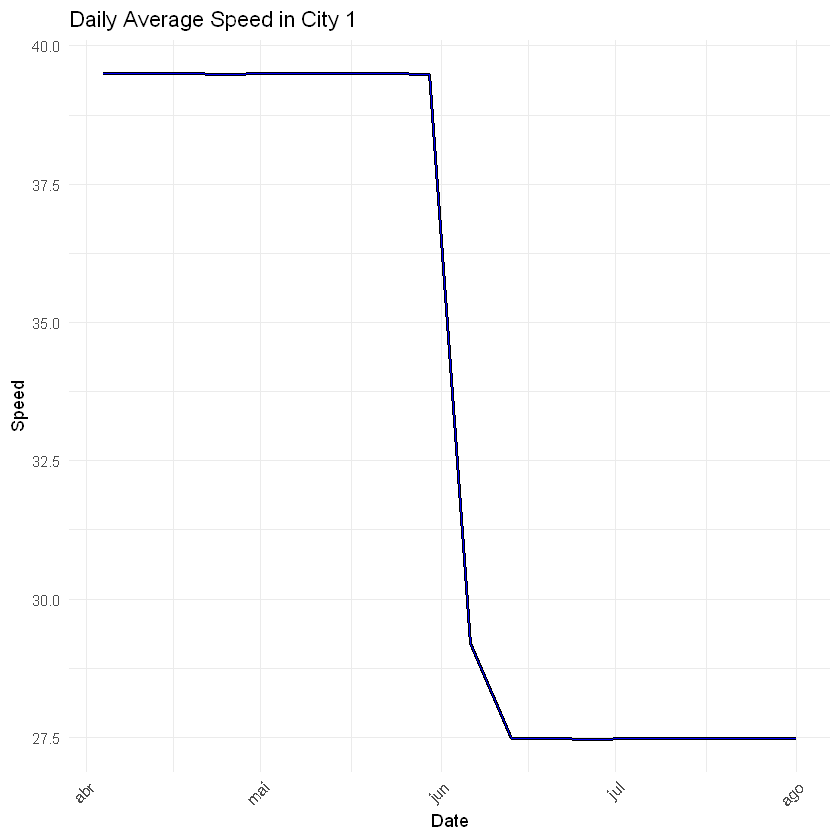

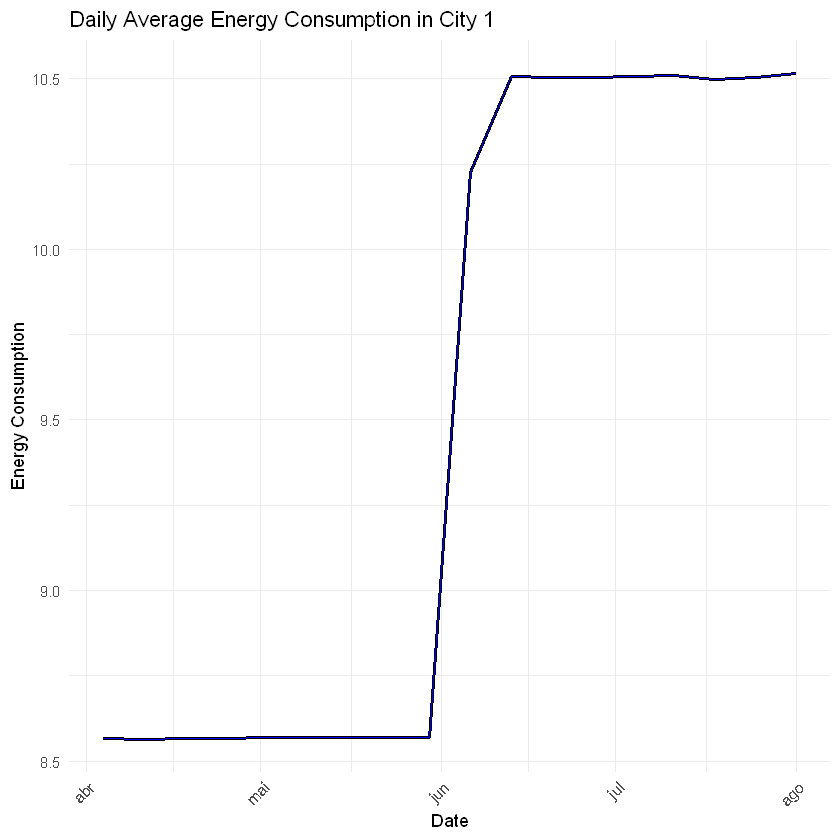

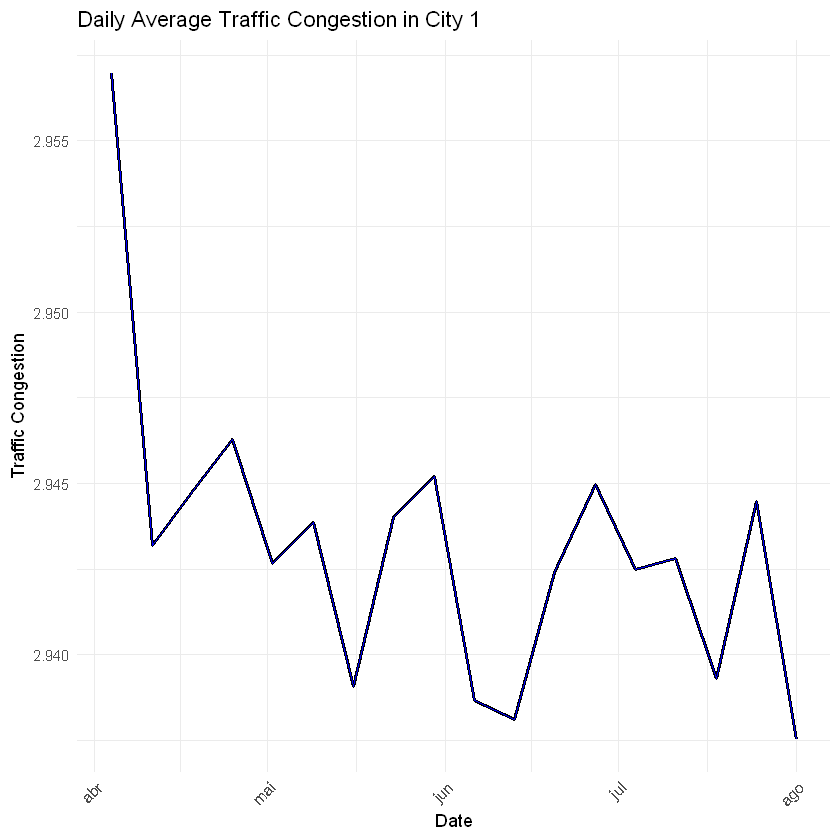

In [26]:
# Speed vs Day
g1 <- ggplot(data_grouped_1, aes(x = day, y = speed)) +
    geom_line(size = 1) +
    labs(title = "Daily Average Speed in City 1", x = "Date", y = "Speed") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Energy consumption vs Day
g2 <- ggplot(data_grouped_1, aes(x = day, y = energyConsumption)) +
    geom_line(size = 1) +
    labs(title = "Daily Average Energy Consumption in City 1", x = "Date", y = "Energy Consumption") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Traffic congestion vs Day
g3 <- ggplot(data_grouped_1, aes(x = day, y = trafficCongestion)) +
    geom_line(size = 1) +
    labs(title = "Daily Average Traffic Congestion in City 1", x = "Date", y = "Traffic Congestion") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


g1 <- g1 + geom_line(color = "blue")
g2 <- g2 + geom_line(color = "blue")
g3 <- g3 + geom_line(color = "blue")


# Plotting
print(g1)
print(g2)
print(g3)

After this, we will do an analysis of the data by station 

In [29]:
# Filter for city 1 and group by station and day
stations_city_1_mean <- data %>%
    filter(city == 1) %>%
    group_by(station, datetime = floor_date(datetime, "day")) %>%
    summarise(speed = mean(speed, na.rm = TRUE),
              energyConsumption = mean(energyConsumption, na.rm = TRUE),
              trafficCongestion = mean(trafficCongestion, na.rm = TRUE),
              carCrash = mean(carCrash, na.rm = TRUE),
              pedestrianDeath = mean(pedestrianDeath, na.rm = TRUE))

head(stations_city_1_mean)

stations_city_6_mean <- data %>%
    filter(city == 6) %>%
    group_by(station, datetime = floor_date(datetime, "day")) %>%
    summarise(speed = mean(speed, na.rm = TRUE),
              energyConsumption = mean(energyConsumption, na.rm = TRUE),
              trafficCongestion = mean(trafficCongestion, na.rm = TRUE),
              carCrash = mean(carCrash, na.rm = TRUE),
              pedestrianDeath = mean(pedestrianDeath, na.rm = TRUE))

head(stations_city_6_mean)

`summarise()` has grouped output by 'station'. You can override using the
`.groups` argument.


station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2021-04-04,39.47956,8.575182,2.914455,0.002747599,0.0005578949
1,2021-04-11,39.48773,8.556106,2.912705,0.002922490,0.0003815325
1,2021-04-18,39.48011,8.567174,2.921677,0.002924062,0.0003472835
1,2021-04-25,39.45676,8.577785,2.901808,0.002909320,0.0002785515
1,2021-05-02,39.51588,8.564596,2.906201,0.002893206,0.0003789540
1,2021-05-09,39.49568,8.578202,2.908553,0.002644048,0.0002253562


`summarise()` has grouped output by 'station'. You can override using the
`.groups` argument.


station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2021-04-04,39.51878,8.577016,2.840004,0.002394024,0.0004976884
1,2021-04-11,39.48979,8.572650,2.820450,0.002932656,0.0003128493
1,2021-04-18,39.52816,8.557522,2.830969,0.002662685,0.0003220616
1,2021-04-25,39.47443,8.558630,2.839044,0.002786874,0.0003174931
1,2021-05-02,39.51526,8.551392,2.797418,0.002579687,0.0003068269
1,2021-05-09,39.50037,8.553937,2.802181,0.002581595,0.0004438765


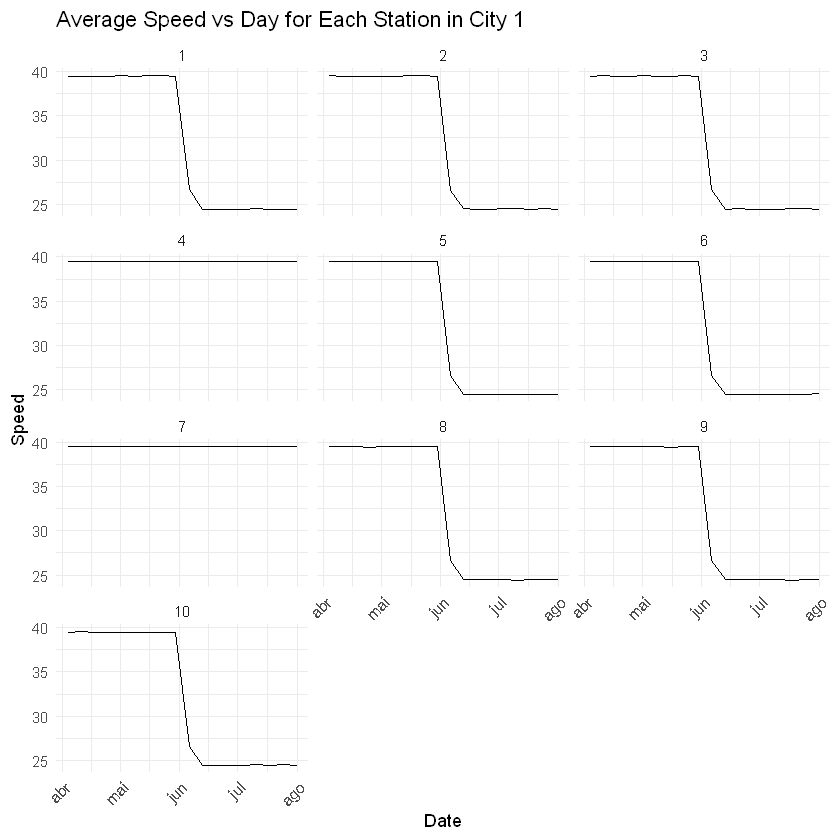

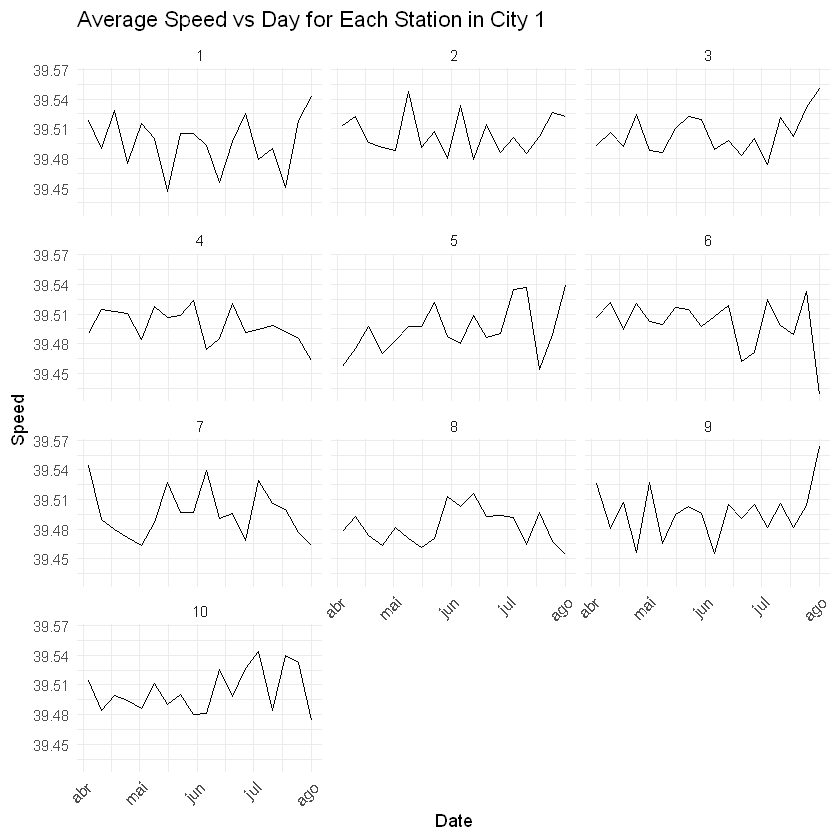

In [30]:
# Plotting
g1 <- ggplot(stations_city_1_mean, aes(x = datetime, y = speed)) +
    geom_line() +
    facet_wrap(~ station, ncol = 3) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(title = "Average Speed vs Day for Each Station in City 1", x = "Date", y = "Speed")

print(g1)

g2 <- ggplot(stations_city_6_mean, aes(x = datetime, y = speed)) +
    geom_line() +
    facet_wrap(~ station, ncol = 3) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(title = "Average Speed vs Day for Each Station in City 1", x = "Date", y = "Speed")

print(g2)

From this plot, we can see that the stations 4 and 7 did not present changes in the average sped, while the other stations did.

After, we will do a macro data exploration, to see how it was the behavior of the city 1 compared to the other cities

In [ ]:
# Drop unnecessary columns and group by city and week
cities_df <- data %>%
    select(-station, -weather, -dow, -hour, -vehicleType) %>%
    group_by(city, datetime = floor_date(datetime, "week")) %>%
    summarise(across(everything(), mean, na.rm = TRUE)) %>%
    ungroup()

tail(cities_df)

Warning message:
"There was 1 warning in `summarise()`.
ℹ In argument: `across(everything(), mean, na.rm = TRUE)`.
ℹ In group 1: `city = 1` and `datetime = 2021-04-04`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))"
`summarise()` has grouped output by 'city'. You can override using the
`.groups` argument.


city,datetime,X,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,2021-06-27,993,39.49601,8.564515,2.900902,0.002869132,0.0003985252
6,2021-07-04,994,39.50567,8.566886,2.908578,0.002905690,0.0003830040
6,2021-07-11,995,39.49917,8.564085,2.908300,0.002846685,0.0003995219
6,2021-07-18,996,39.49093,8.565814,2.904893,0.002901073,0.0003745151
6,2021-07-25,997,39.50651,8.568097,2.908806,0.002839312,0.0003864495
6,2021-08-01,998,39.50009,8.568904,2.883870,0.003156162,0.0003468228


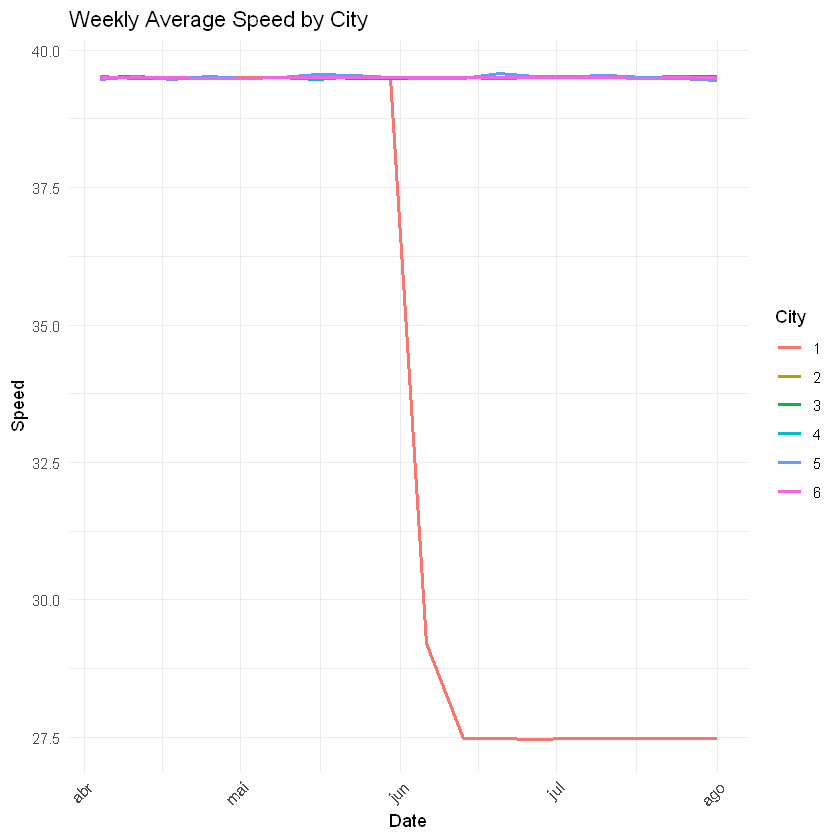

In [ ]:
# Plotting weekly average speed by city
ggplot(cities_df, aes(x = datetime, y = speed, color = as.factor(city))) +
    geom_line(size = 1) +
    labs(title = "Weekly Average Speed by City", x = "Date", y = "Speed", color = "City") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

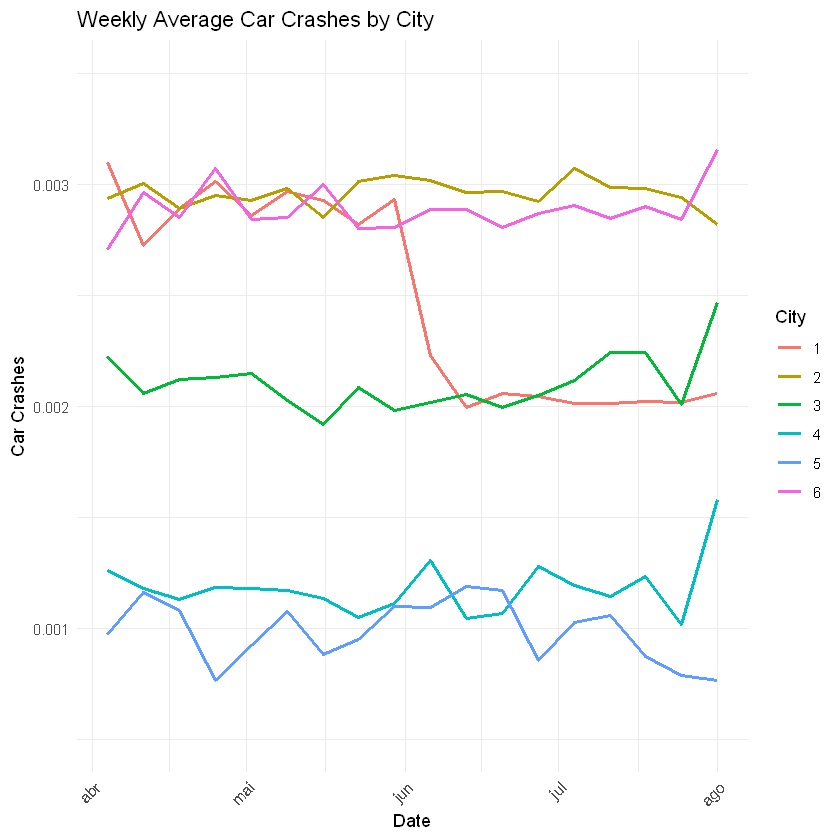

In [ ]:
# Plotting weekly average car crashes by city
ggplot(cities_df, aes(x = datetime, y = carCrash, color = as.factor(city))) +
    geom_line(size = 1) +
    labs(title = "Weekly Average Car Crashes by City", x = "Date", y = "Car Crashes", color = "City") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    ylim(0.0005, 0.0035)

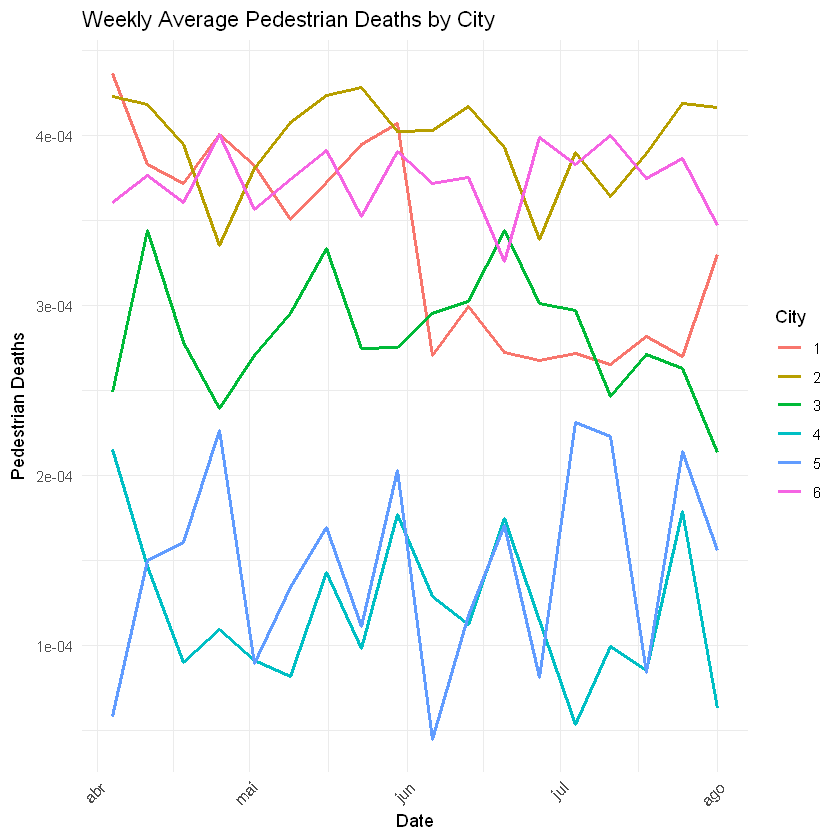

In [ ]:
# Plotting weekly average pedestrian deaths by city
ggplot(cities_df, aes(x = datetime, y = pedestrianDeath, color = as.factor(city))) +
    geom_line(size = 1) +
    labs(title = "Weekly Average Pedestrian Deaths by City", x = "Date", y = "Pedestrian Deaths", color = "City") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))


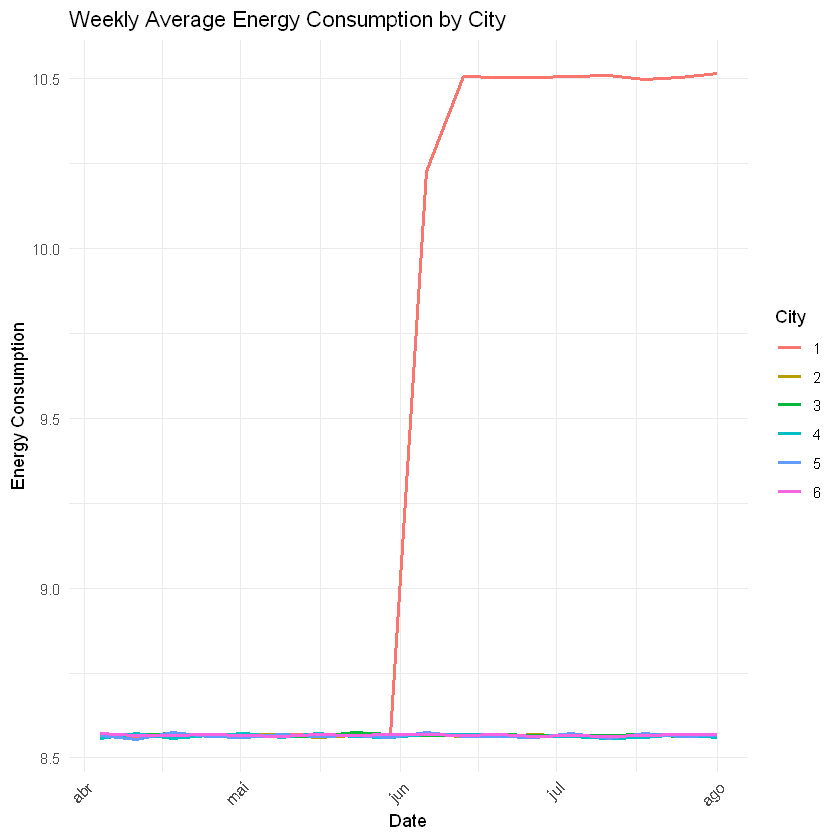

In [ ]:
# TO DO: remove this, we don't need to talk about energy comsumption
# Copy cities_df to energy_consumption_cities
energy_consumption_cities <- cities_df

# Plotting weekly average energy consumption by city
ggplot(energy_consumption_cities, aes(x = datetime, y = energyConsumption, color = as.factor(city))) +
    geom_line(size = 1) +
    labs(title = "Weekly Average Energy Consumption by City", x = "Date", y = "Energy Consumption", color = "City") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

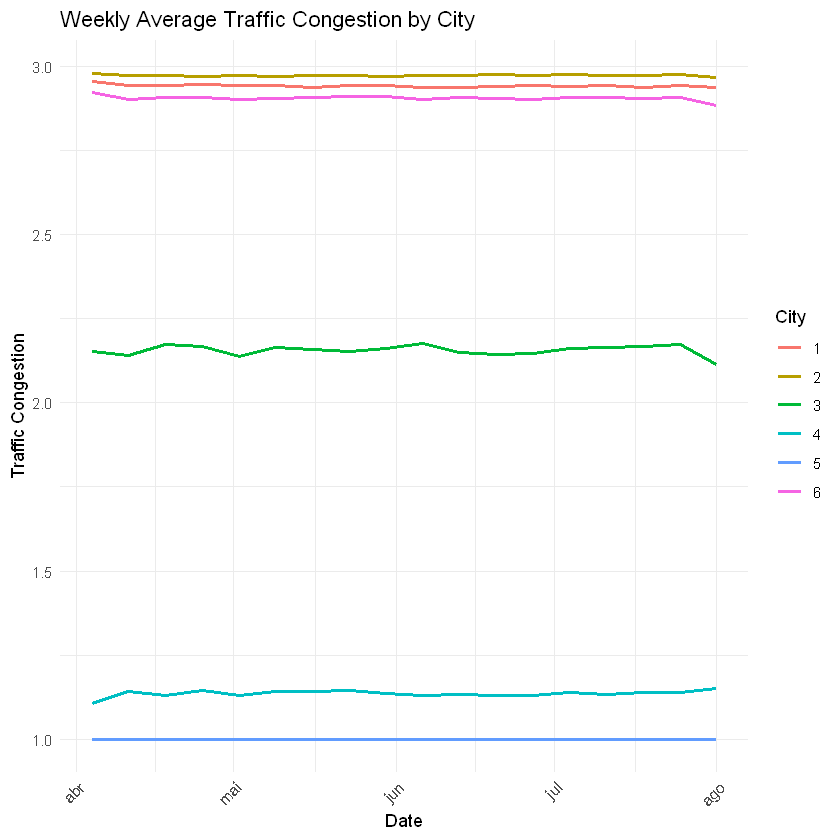

In [ ]:
# Plotting weekly average traffic congestion by city
ggplot(cities_df, aes(x = datetime, y = trafficCongestion, color = as.factor(city))) +
    geom_line(size = 1) +
    labs(title = "Weekly Average Traffic Congestion by City", x = "Date", y = "Traffic Congestion", color = "City") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

We can conclude after see this different analysis, that the speed in city 1 as crashes and pedestrians deaths are lower than the other cities, after the policy was implemented, however the traffic congestion remains the same and the energy comsumption is higher than the other cities,

Now we will see different plots to explore demographic data of the cities

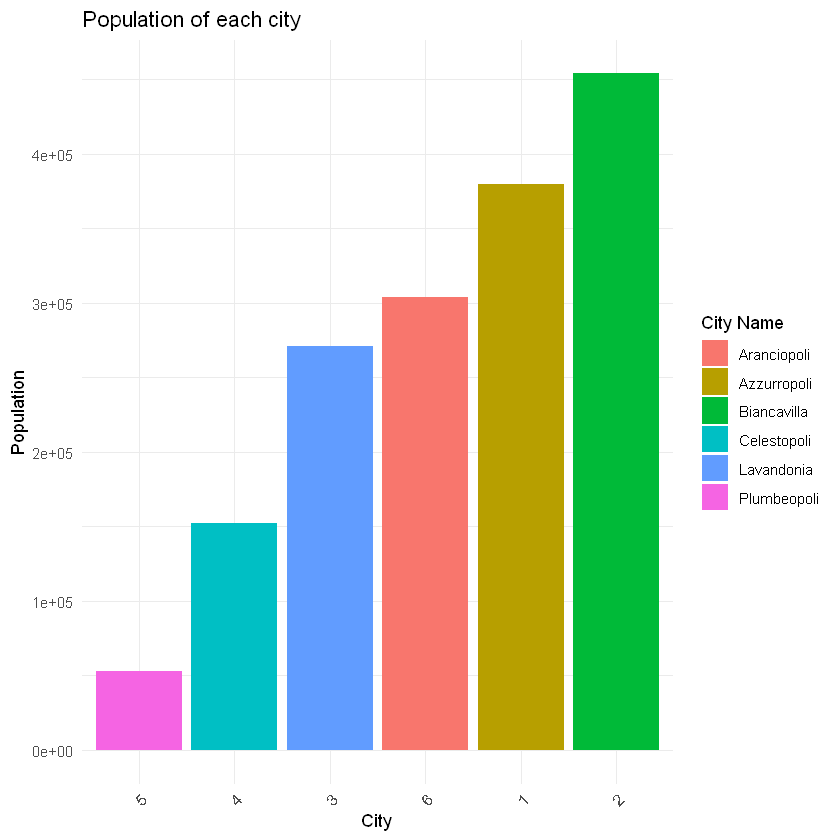

In [ ]:
# Sort city_info by population in ascending order
city_info_sorted <- data_city[order(data_city$population), ]

# Plotting
ggplot(city_info_sorted, aes(x = reorder(city, population), y = population, fill = cityName)) +
    geom_bar(stat = "identity") +
    labs(title = "Population of each city", x = "City", y = "Population") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    guides(fill = guide_legend(title = "City Name"))

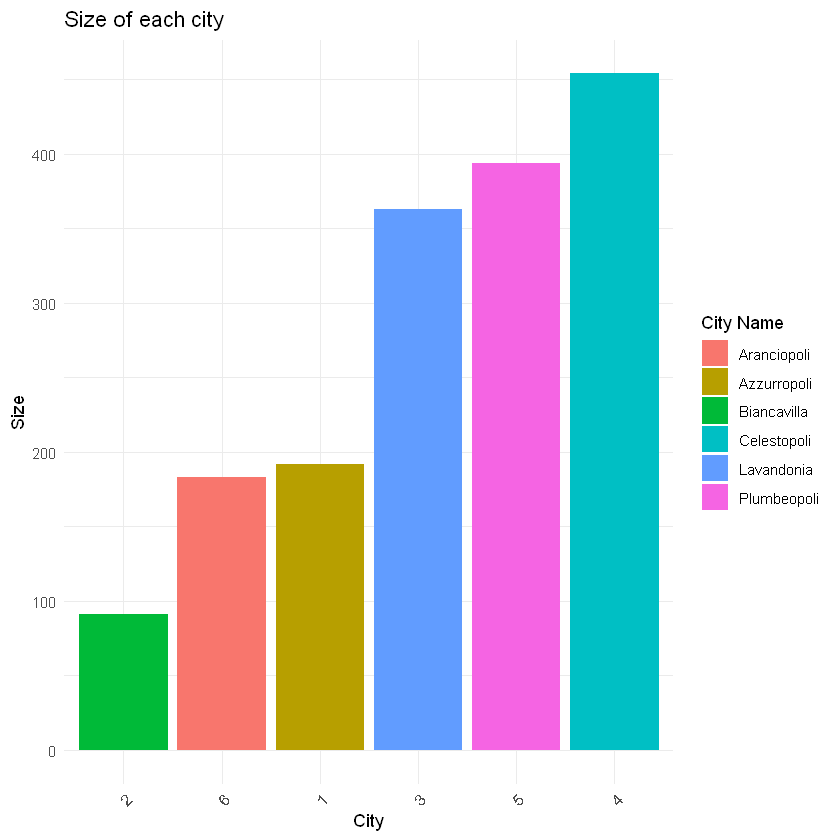

In [ ]:
# Sort city_info by size in ascending order
city_info_sorted <- data_city[order(data_city$size), ]

# Plotting
ggplot(city_info_sorted, aes(x = reorder(city, size), y = size, fill = cityName)) +
    geom_bar(stat = "identity") +
    labs(title = "Size of each city", x = "City", y = "Size") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    guides(fill = guide_legend(title = "City Name"))

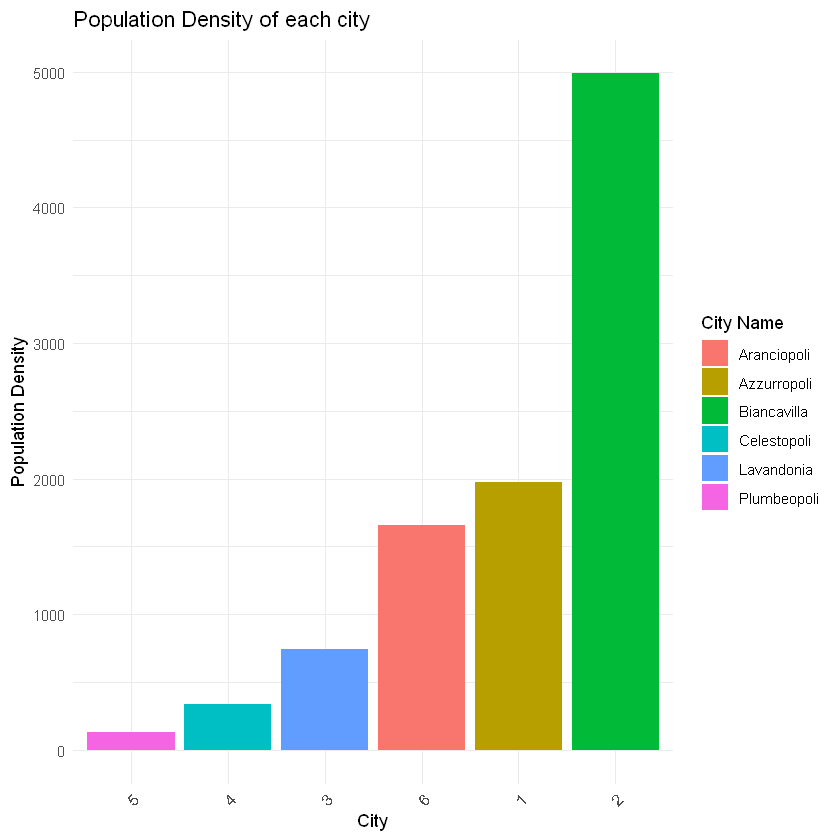

In [ ]:
# Sort city_info by population density in ascending order
city_info_sorted <- data_city[order(data_city$popDensity), ]

# Plotting
ggplot(city_info_sorted, aes(x = reorder(city, popDensity), y = popDensity, fill = cityName)) +
    geom_bar(stat = "identity") +
    labs(title = "Population Density of each city", x = "City", y = "Population Density") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    guides(fill = guide_legend(title = "City Name"))

In [ ]:
data_city

city,size,population,popDensity,cityName
<int>,<int>,<int>,<dbl>,<chr>
1,192,379909,1978.6927,Azzurropoli
2,91,453991,4988.9121,Biancavilla
3,363,271008,746.5785,Lavandonia
4,454,152110,335.0441,Celestopoli
5,394,52620,133.5533,Plumbeopoli
6,183,303659,1659.3388,Aranciopoli


## OLS regression

In [ ]:
head(data_grouped_1)

day,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-04-04,39.49565,8.564762,2.956967,0.003099027,0.0004363516
2021-04-11,39.50350,8.564177,2.943202,0.002722179,0.0003826372
2021-04-18,39.50024,8.565117,2.944780,0.002888727,0.0003713815
2021-04-25,39.48875,8.565089,2.946277,0.003013725,0.0004002502
2021-05-02,39.49929,8.568149,2.942664,0.002857529,0.0003822053
2021-05-09,39.49845,8.567752,2.943864,0.002966018,0.0003504125


In [ ]:
head(stations_city_1_mean)

station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2021-04-04,39.47956,8.575182,2.914455,0.002747599,0.0005578949
1,2021-04-11,39.48773,8.556106,2.912705,0.002922490,0.0003815325
1,2021-04-18,39.48011,8.567174,2.921677,0.002924062,0.0003472835
1,2021-04-25,39.45676,8.577785,2.901808,0.002909320,0.0002785515
1,2021-05-02,39.51588,8.564596,2.906201,0.002893206,0.0003789540
1,2021-05-09,39.49568,8.578202,2.908553,0.002644048,0.0002253562


In [ ]:
#No change stations 4 and 7
unchaged_stations_city_1 <- stations_city_1_mean %>%
    filter(station == 4 | station == 7) %>%
    select(station, datetime, speed, energyConsumption, trafficCongestion, carCrash, pedestrianDeath)

head(unchaged_stations_city_1)

station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,2021-04-04,39.48967,8.565780,2.974076,0.003235741,0.0004213674
4,2021-04-11,39.47880,8.574798,2.971035,0.002565635,0.0003973302
4,2021-04-18,39.50543,8.563384,2.966983,0.002858637,0.0003001590
4,2021-04-25,39.53006,8.558057,2.971815,0.002968480,0.0003957429
4,2021-05-02,39.45286,8.571469,2.949179,0.002778260,0.0003600140
4,2021-05-09,39.51006,8.566033,2.965301,0.003110384,0.0004219857


In [ ]:
#Change stations 1, 2, 3, 5, 6, 8, 9, 10
changed_stations_city_1 <- stations_city_1_mean %>%
    filter(station == 1 | station == 2 | station == 3 | station == 5 | station == 6 | station == 8 | station == 9 | station == 10) %>%
    select(station, datetime, speed, energyConsumption, trafficCongestion, carCrash, pedestrianDeath)

head(changed_stations_city_1)


station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2021-04-04,39.47956,8.575182,2.914455,0.002747599,0.0005578949
1,2021-04-11,39.48773,8.556106,2.912705,0.002922490,0.0003815325
1,2021-04-18,39.48011,8.567174,2.921677,0.002924062,0.0003472835
1,2021-04-25,39.45676,8.577785,2.901808,0.002909320,0.0002785515
1,2021-05-02,39.51588,8.564596,2.906201,0.002893206,0.0003789540
1,2021-05-09,39.49568,8.578202,2.908553,0.002644048,0.0002253562


In [ ]:
# OLS regression for unchanged stations

# pedestrianDeath vs other variables
model_unchanged_stations_city_1 <- lm(pedestrianDeath ~ speed + energyConsumption + trafficCongestion + carCrash, data = unchaged_stations_city_1)

summary(model_unchanged_stations_city_1)


Call:
lm(formula = pedestrianDeath ~ speed + energyConsumption + trafficCongestion + 
    carCrash, data = unchaged_stations_city_1)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.374e-04 -5.581e-05 -6.250e-06  3.218e-05  3.326e-04 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)        1.622e-04  4.882e-02   0.003   0.9974  
speed              8.222e-05  8.931e-04   0.092   0.9272  
energyConsumption -7.510e-04  2.523e-03  -0.298   0.7679  
trafficCongestion  1.183e-03  6.154e-04   1.923   0.0638 .
carCrash          -1.819e-02  7.829e-02  -0.232   0.8178  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0001037 on 31 degrees of freedom
Multiple R-squared:  0.1206,	Adjusted R-squared:  0.007172 
F-statistic: 1.063 on 4 and 31 DF,  p-value: 0.3913


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


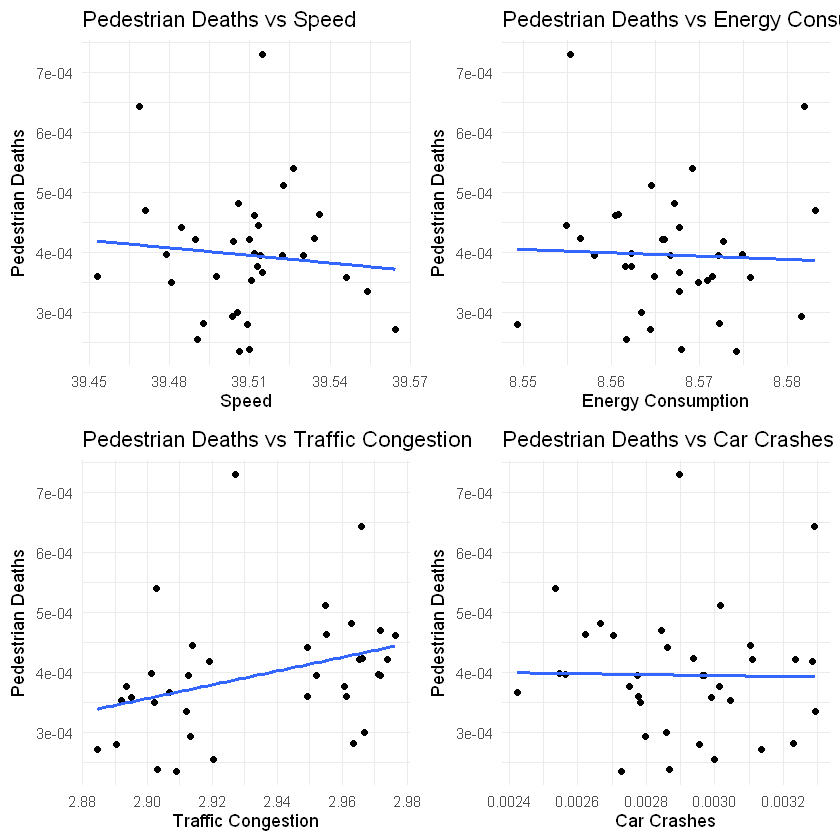

In [ ]:
# Plotting
p1 <- ggplot(unchaged_stations_city_1, aes(x = speed, y = pedestrianDeath)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Pedestrian Deaths vs Speed", x = "Speed", y = "Pedestrian Deaths") +
    theme_minimal()

p2 <- ggplot(unchaged_stations_city_1, aes(x = energyConsumption, y = pedestrianDeath)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Pedestrian Deaths vs Energy Consumption", x = "Energy Consumption", y = "Pedestrian Deaths") +
    theme_minimal()

p3 <- ggplot(unchaged_stations_city_1, aes(x = trafficCongestion, y = pedestrianDeath)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Pedestrian Deaths vs Traffic Congestion", x = "Traffic Congestion", y = "Pedestrian Deaths") +
    theme_minimal()

p4 <- ggplot(unchaged_stations_city_1, aes(x = carCrash, y = pedestrianDeath)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Pedestrian Deaths vs Car Crashes", x = "Car Crashes", y = "Pedestrian Deaths") +
    theme_minimal()

grid.arrange(p1, p2, p3, p4, ncol = 2, nrow = 2)


In [ ]:
# carCrash vs other variables
model_unchanged_stations_city_1 <- lm(carCrash ~ speed + energyConsumption + trafficCongestion + pedestrianDeath, data = unchaged_stations_city_1)

summary(model_unchanged_stations_city_1)


Call:
lm(formula = carCrash ~ speed + energyConsumption + trafficCongestion + 
    pedestrianDeath, data = unchaged_stations_city_1)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.636e-04 -1.376e-04 -8.710e-06  1.486e-04  4.178e-04 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)       -0.0800202  0.1109831  -0.721    0.476
speed              0.0015745  0.0020278   0.776    0.443
energyConsumption  0.0020924  0.0057785   0.362    0.720
trafficCongestion  0.0009629  0.0014822   0.650    0.521
pedestrianDeath   -0.0955692  0.4113081  -0.232    0.818

Residual standard error: 0.0002376 on 31 degrees of freedom
Multiple R-squared:  0.02452,	Adjusted R-squared:  -0.1014 
F-statistic: 0.1948 on 4 and 31 DF,  p-value: 0.9393


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


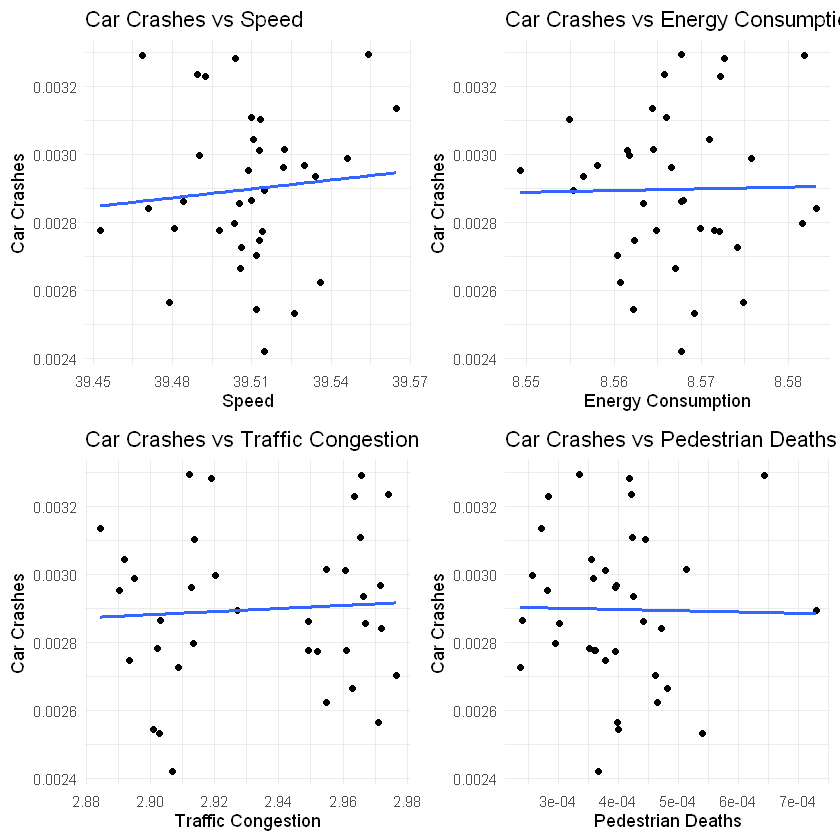

In [ ]:
#Plotting
    p1 <- ggplot(unchaged_stations_city_1, aes(x = speed, y = carCrash)) +
        geom_point() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = "Car Crashes vs Speed ", x = "Speed", y = "Car Crashes") +
        theme_minimal()

    p2 <- ggplot(unchaged_stations_city_1, aes(x = energyConsumption, y = carCrash)) +
        geom_point() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = "Car Crashes vs Energy Consumption ", x = "Energy Consumption", y = "Car Crashes") +
        theme_minimal()

    p3 <- ggplot(unchaged_stations_city_1, aes(x = trafficCongestion, y = carCrash)) +
        geom_point() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = "Car Crashes vs Traffic Congestion ", x = "Traffic Congestion", y = "Car Crashes") +
        theme_minimal()

    p4 <- ggplot(unchaged_stations_city_1, aes(x = pedestrianDeath, y = carCrash)) +
        geom_point() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = "Car Crashes vs Pedestrian Deaths ", x = "Pedestrian Deaths", y = "Car Crashes") +
        theme_minimal()

    grid.arrange(p1, p2, p3, p4, ncol = 2, nrow = 2)

In [ ]:
# OLS regression for changed stations

# pedestrianDeath vs other variables
model_changed_stations_city_1 <- lm(pedestrianDeath ~ speed + energyConsumption + trafficCongestion + carCrash, data = changed_stations_city_1)

summary(model_changed_stations_city_1)


Call:
lm(formula = pedestrianDeath ~ speed + energyConsumption + trafficCongestion + 
    carCrash, data = changed_stations_city_1)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.682e-04 -5.207e-05 -1.075e-05  4.254e-05  3.453e-04 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)       -0.0235460  0.0139045  -1.693   0.0926 .
speed              0.0002560  0.0001481   1.728   0.0862 .
energyConsumption  0.0015310  0.0009188   1.666   0.0979 .
trafficCongestion  0.0002423  0.0003346   0.724   0.4703  
carCrash          -0.0029517  0.0361909  -0.082   0.9351  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.704e-05 on 139 degrees of freedom
Multiple R-squared:  0.438,	Adjusted R-squared:  0.4219 
F-statistic: 27.09 on 4 and 139 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


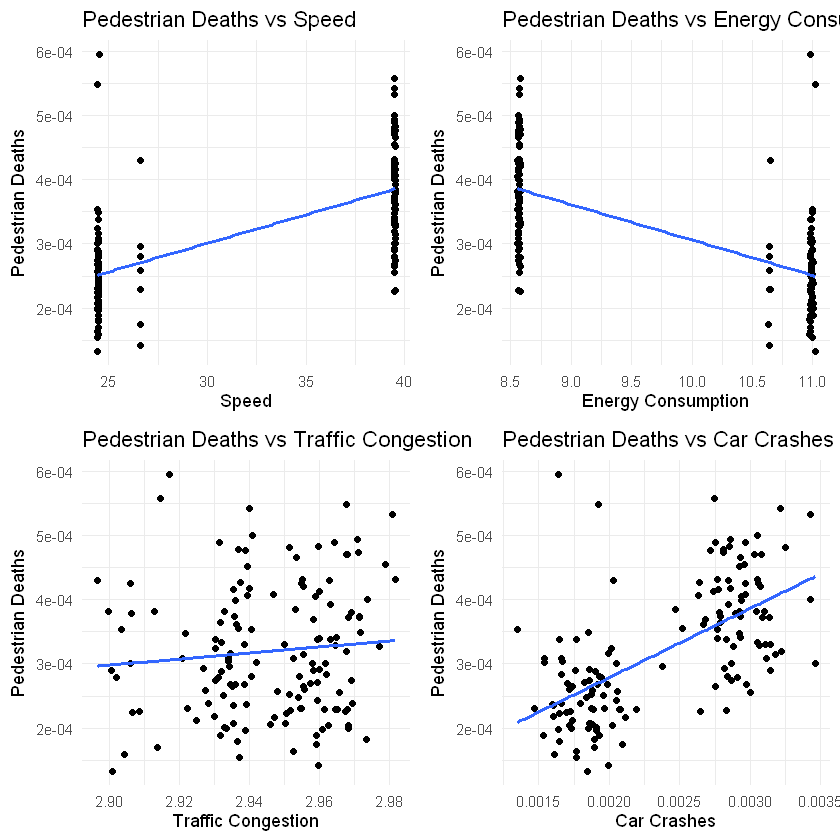

In [ ]:
# Plotting
p1 <- ggplot(changed_stations_city_1, aes(x = speed, y = pedestrianDeath)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Pedestrian Deaths vs Speed", x = "Speed", y = "Pedestrian Deaths") +
    theme_minimal()

p2 <- ggplot(changed_stations_city_1, aes(x = energyConsumption, y = pedestrianDeath)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Pedestrian Deaths vs Energy Consumption", x = "Energy Consumption", y = "Pedestrian Deaths") +
    theme_minimal()

p3 <- ggplot(changed_stations_city_1, aes(x = trafficCongestion, y = pedestrianDeath)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Pedestrian Deaths vs Traffic Congestion", x = "Traffic Congestion", y = "Pedestrian Deaths") +
    theme_minimal()

p4 <- ggplot(changed_stations_city_1, aes(x = carCrash, y = pedestrianDeath)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Pedestrian Deaths vs Car Crashes", x = "Car Crashes", y = "Pedestrian Deaths") +
    theme_minimal()

grid.arrange(p1, p2, p3, p4, ncol = 2, nrow = 2)


In [ ]:
# carCrash vs other variables
model_changed_stations_city_1 <- lm(carCrash ~ speed + energyConsumption + trafficCongestion + pedestrianDeath, data = changed_stations_city_1)

summary(model_changed_stations_city_1)


Call:
lm(formula = carCrash ~ speed + energyConsumption + trafficCongestion + 
    pedestrianDeath, data = changed_stations_city_1)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.701e-04 -1.281e-04  1.880e-06  1.284e-04  5.020e-04 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)        1.085e-03  3.292e-02   0.033  0.97375   
speed             -2.597e-06  3.509e-04  -0.007  0.99410   
energyConsumption -4.762e-04  2.174e-03  -0.219  0.82696   
trafficCongestion  2.047e-03  7.663e-04   2.671  0.00847 **
pedestrianDeath   -1.621e-02  1.988e-01  -0.082  0.93511   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0001806 on 139 degrees of freedom
Multiple R-squared:  0.9071,	Adjusted R-squared:  0.9044 
F-statistic: 339.2 on 4 and 139 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


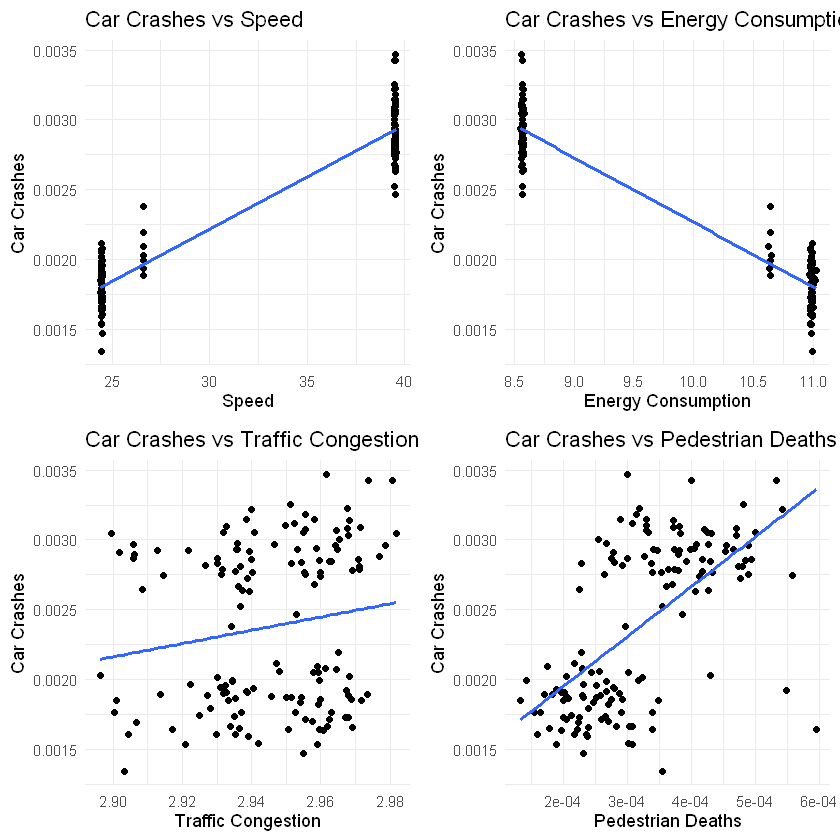

In [ ]:
# Plotting
p1 <- ggplot(changed_stations_city_1, aes(x = speed, y = carCrash)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Car Crashes vs Speed", x = "Speed", y = "Car Crashes") +
    theme_minimal()

p2 <- ggplot(changed_stations_city_1, aes(x = energyConsumption, y = carCrash)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Car Crashes vs Energy Consumption", x = "Energy Consumption", y = "Car Crashes") +
    theme_minimal()

p3 <- ggplot(changed_stations_city_1, aes(x = trafficCongestion, y = carCrash)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Car Crashes vs Traffic Congestion", x = "Traffic Congestion", y = "Car Crashes") +
    theme_minimal()

p4 <- ggplot(changed_stations_city_1, aes(x = pedestrianDeath, y = carCrash)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Car Crashes vs Pedestrian Deaths", x = "Pedestrian Deaths", y = "Car Crashes") +
    theme_minimal()

grid.arrange(p1, p2, p3, p4, ncol = 2, nrow = 2)


In [ ]:
# carCrash vs other variables
model_changed_stations_city_1 <- lm(carCrash ~ speed + energyConsumption + trafficCongestion, data = changed_stations_city_1)

summary(model_changed_stations_city_1)


Call:
lm(formula = carCrash ~ speed + energyConsumption + trafficCongestion, 
    data = changed_stations_city_1)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0004700 -0.0001284  0.0000010  0.0001277  0.0005033 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)        1.467e-03  3.247e-02   0.045  0.96403   
speed             -6.747e-06  3.459e-04  -0.020  0.98447   
energyConsumption -5.010e-04  2.145e-03  -0.234  0.81567   
trafficCongestion  2.043e-03  7.622e-04   2.680  0.00824 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0001799 on 140 degrees of freedom
Multiple R-squared:  0.9071,	Adjusted R-squared:  0.9051 
F-statistic: 455.4 on 3 and 140 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


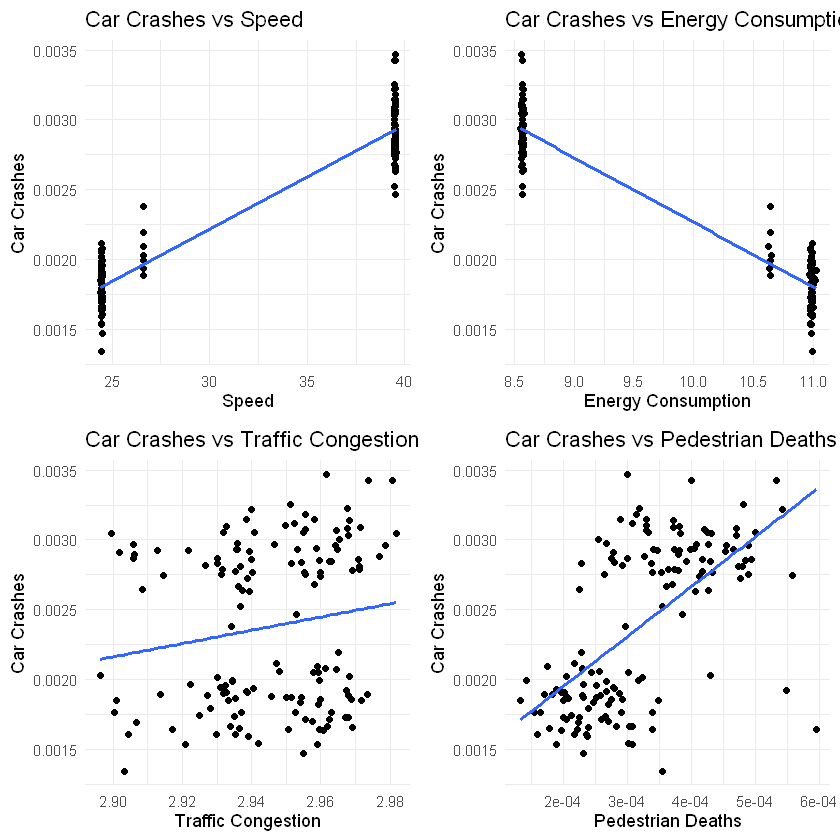

In [ ]:
# Plotting
p1 <- ggplot(changed_stations_city_1, aes(x = speed, y = carCrash)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Car Crashes vs Speed", x = "Speed", y = "Car Crashes") +
    theme_minimal()

p2 <- ggplot(changed_stations_city_1, aes(x = energyConsumption, y = carCrash)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Car Crashes vs Energy Consumption", x = "Energy Consumption", y = "Car Crashes") +
    theme_minimal()

p3 <- ggplot(changed_stations_city_1, aes(x = trafficCongestion, y = carCrash)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Car Crashes vs Traffic Congestion", x = "Traffic Congestion", y = "Car Crashes") +
    theme_minimal()

p4 <- ggplot(changed_stations_city_1, aes(x = pedestrianDeath, y = carCrash)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Car Crashes vs Pedestrian Deaths", x = "Pedestrian Deaths", y = "Car Crashes") +
    theme_minimal()

grid.arrange(p1, p2, p3, p4, ncol = 2, nrow = 2)


In [ ]:
library(dplyr)
library(data.table)
library(readr)
library(fixest)

dat <- read_csv("data/weeklyGrouping.csv")

dat$datetime <- as.Date(dat$datetime)

dat <- dat %>%
  mutate(treated_time = floor(as.numeric(difftime(datetime, as.Date("2021-06-01"), units = "weeks"))))

library(dplyr)

dat_stations <- filter(dat, city == 1)

dat_stations <- dat_stations %>%
  mutate(treated = ifelse(station %in% c(4, 7), 0, 1))

mod_twfe <- feols(pedestrianDeath ~ i(treated_time, treated, ref = -1),
                  data = dat_stations)

# png("results/pedestDeathPerWeekStations.png", width = 800, height = 500)
# iplot(mod_twfe, ref.line = -1, xlab = "Time to treatment",
#       main = "Effect on Pedestrian Deaths",
#       ylab = "Estimate and 95% Conf. Int.",
#       xlim = c(-9, 8),
#       legend = "treated")
# axis(1, at = -9:8, labels = -9:8)
# dev.off()

mod_twfe <- feols(carCrash ~ i(treated_time, treated, ref = -1),
                  data = dat_stations)
# png("results/carCrashPerWeekStations.png", width = 800, height = 500)
# iplot(mod_twfe, ref.line = -1, xlab = "Time to treatment",
#       main = "Effect on Car Crashes",
#       ylab = "Estimate and 95% Conf. Int.",
#       xlim = c(-9, 8),
#       legend = "treated")
# axis(1, at = -9:8, labels = -9:8)
# dev.off()

dat_cities <- filter(dat, city %in% c(1, 6))

dat_cities <- mutate(dat_cities, treated = ifelse(city == 1, 1, 0))

mod_twfe <- feols(pedestrianDeath ~ i(treated_time, treated, ref = -1),
                  data = dat_cities)
# png("results/pedestDeathPerWeekCities.png", width = 800, height = 500)
# iplot(mod_twfe, ref.line = -1, xlab = "Time to treatment",
#       main = "Effect on Pedestrian Deaths",
#       ylab = "Estimate and 95% Conf. Int.",
#       xlim = c(-9, 8),
#       legend = "treated")
# axis(1, at = -9:8, labels = -9:8)
# dev.off()

mod_twfe <- feols(carCrash ~ i(treated_time, treated, ref = -1),
                  data = dat_cities)
summary(mod_twfe)
# png("results/carCrashPerWeekCities.png", width = 800, height = 500)
# iplot(mod_twfe, ref.line = -1, xlab = "Time to treatment",
#       main = "Effect on Car Crashes",
#       ylab = "Estimate and 95% Conf. Int.",
#       xlim = c(-9, 8),
#       legend = "treated")
# axis(1, at = -9:8, labels = -9:8)
# dev.off()


New names:
• `` -> `...1`
Rows: 1080 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (12): ...1, city, station, weather, dow, hour, speed, vehicleType, ener...
date  (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


OLS estimation, Dep. Var.: carCrash
Observations: 360
Standard-errors: IID 
                            Estimate Std. Error    t value   Pr(>|t|)    
(Intercept)               0.00289071   0.000024 121.317465  < 2.2e-16 ***
treated_time::-9:treated  0.00020832   0.000107   1.954910 5.1408e-02 .  
treated_time::-8:treated -0.00016853   0.000107  -1.581561 1.1467e-01    
treated_time::-7:treated -0.00000198   0.000107  -0.018617 9.8516e-01    
treated_time::-6:treated  0.00012301   0.000107   1.154406 2.4914e-01    
treated_time::-5:treated -0.00003318   0.000107  -0.311390 7.5569e-01    
treated_time::-4:treated  0.00007531   0.000107   0.706700 4.8023e-01    
treated_time::-3:treated  0.00003419   0.000107   0.320846 7.4852e-01    
treated_time::-2:treated -0.00007254   0.000107  -0.680737 4.9650e-01    
treated_time::0:treated  -0.00066075   0.000107  -6.200698 1.6202e-09 ***
treated_time::1:treated  -0.00089433   0.000107  -8.392676 1.2728e-15 ***
treated_time::2:treated  -0.00083440

: 

In [40]:
dat <- read.csv("data/weeklyGrouping.csv")

dat$datetime <- as.Date(dat$datetime)

dat_city_1_and_6 <- filter(dat, city %in% c(1, 6))

dat_city_1_and_6 <- dat_city_1_and_6 %>%
  mutate(t = ifelse(datetime >= as.Date("2021-06-01"), 1, 0))

dat_city_1_and_6 <- dat_city_1_and_6 %>%
  mutate(g = ifelse(city == 1 & station %in% c(4, 7), 0, 1))

dat_city_1_and_6 <- dat_city_1_and_6 %>%
  mutate(gt = g * t)

dat_city_1_and_6


X,city,station,datetime,weather,dow,hour,speed,vehicleType,energyConsumption,trafficCongestion,carCrash,pedestrianDeath,t,g,gt
<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,2021-04-04,2.134516,5.5,12.45583,39.47956,2.253887,8.575182,2.914455,0.002747599,0.0005578949,0,1,0
1,1,1,2021-04-11,1.996655,4.0,13.05422,39.48773,2.241608,8.556106,2.912705,0.002922490,0.0003815325,0,1,0
2,1,1,2021-04-18,2.115383,4.0,13.02269,39.48011,2.249241,8.567174,2.921677,0.002924062,0.0003472835,0,1,0
3,1,1,2021-04-25,1.994133,4.0,13.08781,39.45676,2.253827,8.577785,2.901808,0.002909320,0.0002785515,0,1,0
4,1,1,2021-05-02,1.995093,4.0,12.81332,39.51588,2.250422,8.564596,2.906201,0.002893206,0.0003789540,0,1,0
5,1,1,2021-05-09,2.020412,4.0,12.86606,39.49568,2.257699,8.578202,2.908553,0.002644048,0.0002253562,0,1,0
6,1,1,2021-05-16,2.035659,4.0,13.08282,39.50939,2.260031,8.579080,2.899503,0.003044047,0.0003821967,0,1,0
7,1,1,2021-05-23,2.062368,4.0,12.95032,39.50602,2.253150,8.570641,2.905931,0.002864055,0.0003002564,0,1,0
8,1,1,2021-05-30,2.076842,4.0,12.96777,39.46474,2.252839,8.575453,2.905925,0.002967461,0.0004257563,0,1,0


In [41]:
# Run regression
model <- lm(carCrash ~ g + t + gt, data = dat_city_1_and_6)

# Summary of regression results
summary(model)


Call:
lm(formula = carCrash ~ g + t + gt, data = dat_city_1_and_6)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.079e-03 -2.938e-04  1.791e-05  2.957e-04  1.917e-03 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.858e-03  1.018e-04  28.060  < 2e-16 ***
g            4.197e-05  1.073e-04   0.391  0.69605    
t            8.219e-05  1.440e-04   0.571  0.56858    
gt          -5.586e-04  1.518e-04  -3.680  0.00027 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0004321 on 356 degrees of freedom
Multiple R-squared:  0.2337,	Adjusted R-squared:  0.2273 
F-statistic:  36.2 on 3 and 356 DF,  p-value: < 2.2e-16


## Conclusion

After to do different OLS approaches, we decide to move forward with the car accidents against speed using as controls the energy consumption and the traffic congestion.

We found that there is different reasons that could lead the model for bias,

The principal is **Endogeneity**, the `trafficCongestion` could lead to a reverse causality, as explanatory variable this could be affected by the dependent variable `carCrash`, higher traffic congestion could lead to more car crashes, but also more car crashes could lead to higher traffic congestion, creating a feedback loop, that can not be explained by the model.

Another important factors that are not in the data like the **weather conditions**, the **road conditions** and the **driver behavior** could lead to a bias in the model as are not possible to have this data in the dataset.

Another reason is **Multi-collinearity**, `trafficCongestion` , `carCrash` and `pedestrianDeath` have a high correlation between them, this could lead to a bias in the model because the model could not differentiate the effect of each variable without distiguish the correlation of the causality, generating maybe a model that is based in the correlation and not in the causality.

The **Heteroskedasticity** is another reason that could lead to a bias in the model, areas with high traffic congestion might have more variability in the car crashes, affecting the accuracy of the standard model.

The **Measurement error** is one of the important reasons that could lead to a bias, being almost all the data aggregated, or maybe estimated from imperfect measurements, for example no reported crashes can lead to systematic bias.

**Non-Linearity** : as some relationships between variables might not be striclty linear, for example the effect of speed on crashes might not be linear, where extremely low or high speeds increase crash rates, but moderate speeds are safer.

**Auto-correlation** : the model is not based in time series, however using a model in time series could lead to a influence of the past values in the future values, as example a severe accident from previous days could lead to a higher traffic congestion in the next days, leading to bias in the model.